In [58]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
str = tf.constant('hello')

2023-06-07 13:12:22.850932: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-07 13:12:22.850967: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-07 13:12:22.850989: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (harshit): /proc/driver/nvidia/version does not exist
2023-06-07 13:12:22.851325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print(str)

tf.Tensor(b'hello', shape=(), dtype=string)


In [4]:
print(str.numpy())

b'hello'


In [5]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

In [6]:
add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

# Access tensors value.
print("add =", add.numpy())
print("sub =", sub.numpy())
print("mul =", mul.numpy())
print("div =", div.numpy())

add = 5
sub = -1
mul = 6
div = 0.6666666666666666


In [7]:
Mean = tf.reduce_mean([a,b,c])
print("Mean =", Mean.numpy())

Mean = 3


In [8]:
# Matrix multiplications.
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[5., 6.], [7., 8.]])

product = tf.matmul(matrix1, matrix2)

In [9]:
product.numpy()

array([[19., 22.],
       [43., 50.]], dtype=float32)

In [10]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [11]:
X,Y

(array([ 3.3  ,  4.4  ,  5.5  ,  6.71 ,  6.93 ,  4.168,  9.779,  6.182,
         7.59 ,  2.167,  7.042, 10.791,  5.313,  7.997,  5.654,  9.27 ,
         3.1  ]),
 array([1.7  , 2.76 , 2.09 , 3.19 , 1.694, 1.573, 3.366, 2.596, 2.53 ,
        1.221, 2.827, 3.465, 1.65 , 2.904, 2.42 , 2.94 , 1.3  ]))

In [12]:
learning_rate = 0.001
training_steps = 1000
display_steps = 50

In [13]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

W.numpy(),b.numpy()

(-0.24799928, -1.3976781)

In [14]:
def linear_regression(x):
    return W*x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#stochastic gradient descent
optimizer = tf.optimizers.SGD(learning_rate)

In [15]:
def run_optimization():
    with tf.GradientTape() as tape:
        #automatic differentiation
        y_pred = linear_regression(X)
        loss = mean_square(y_pred, Y)
        
    gradient = tape.gradient(loss, [W,b])
    
    optimizer.apply_gradients(zip(gradient, [W,b]))

In [18]:
for step in range(training_steps):
    run_optimization()
    
    if (step) % display_steps == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 0, loss: 0.484707, W: 0.482225, b: -0.835975
step: 50, loss: 0.476771, W: 0.479442, b: -0.816250
step: 100, loss: 0.469025, W: 0.476693, b: -0.796762
step: 150, loss: 0.461465, W: 0.473978, b: -0.777509
step: 200, loss: 0.454086, W: 0.471295, b: -0.758489
step: 250, loss: 0.446885, W: 0.468644, b: -0.739698
step: 300, loss: 0.439856, W: 0.466026, b: -0.721134
step: 350, loss: 0.432995, W: 0.463439, b: -0.702793
step: 400, loss: 0.426300, W: 0.460883, b: -0.684675
step: 450, loss: 0.419765, W: 0.458358, b: -0.666774
step: 500, loss: 0.413386, W: 0.455864, b: -0.649090
step: 550, loss: 0.407161, W: 0.453400, b: -0.631619
step: 600, loss: 0.401085, W: 0.450965, b: -0.614359
step: 650, loss: 0.395155, W: 0.448560, b: -0.597308
step: 700, loss: 0.389367, W: 0.446184, b: -0.580462
step: 750, loss: 0.383717, W: 0.443836, b: -0.563819
step: 800, loss: 0.378204, W: 0.441517, b: -0.547377
step: 850, loss: 0.372822, W: 0.439226, b: -0.531133
step: 900, loss: 0.367570, W: 0.436962, b: -0.515

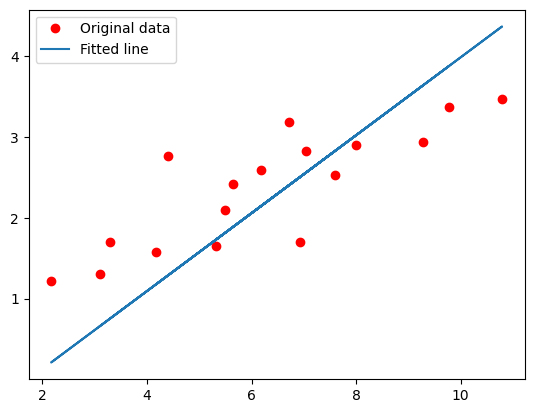

In [17]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

In [34]:
num_features = 28*28 # 784 features for 28*28 pixels value
num_classes = 10 # for 0 to 9 digit
batch_size = 256

In [28]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [32]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train/255.0, x_test/255.0

In [35]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

2023-06-07 14:00:03.280862: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


In [39]:
W = tf.Variable(tf.ones([num_classes, num_features]), name='weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias')

In [61]:
W,b

(<tf.Variable 'weight:0' shape=(784, 10) dtype=float32, numpy=
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.01147551,  0.02376843, -0.00454773, -0.00378904,  0.00328921,
         0.00059585, -0.00243959,  0.00769089, -0.01241477, -0.00067772],
       dtype=float32)>)

In [40]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x,W) + b)

def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [53]:
def run_optimization2(x,y):
    
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss = cross_entropy(y_pred,y)
    
    gradient = tape.gradient(loss, [W,b])
    
    optimizer.apply_gradients(zip(gradient, [W,b]))

In [55]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization2(batch_x, batch_y)
    
    if step % display_steps == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 2.249844, accuracy: 0.640625
step: 100, loss: 2.203681, accuracy: 0.703125
step: 150, loss: 2.157862, accuracy: 0.710938
step: 200, loss: 2.097057, accuracy: 0.742188
step: 250, loss: 2.059357, accuracy: 0.730469
step: 300, loss: 2.001390, accuracy: 0.792969
step: 350, loss: 1.973078, accuracy: 0.777344
step: 400, loss: 1.928221, accuracy: 0.707031
step: 450, loss: 1.871114, accuracy: 0.777344
step: 500, loss: 1.872411, accuracy: 0.718750
step: 550, loss: 1.840522, accuracy: 0.730469
step: 600, loss: 1.803590, accuracy: 0.769531
step: 650, loss: 1.742047, accuracy: 0.785156
step: 700, loss: 1.722640, accuracy: 0.781250
step: 750, loss: 1.673572, accuracy: 0.761719
step: 800, loss: 1.669089, accuracy: 0.789062
step: 850, loss: 1.700266, accuracy: 0.691406
step: 900, loss: 1.619535, accuracy: 0.777344
step: 950, loss: 1.555039, accuracy: 0.777344
step: 1000, loss: 1.599901, accuracy: 0.746094


In [56]:
# Test model on validation set.
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.790000


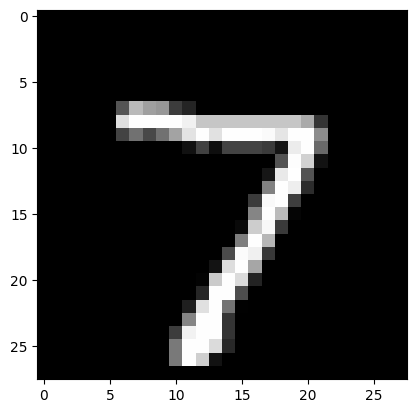

Model prediction: 7


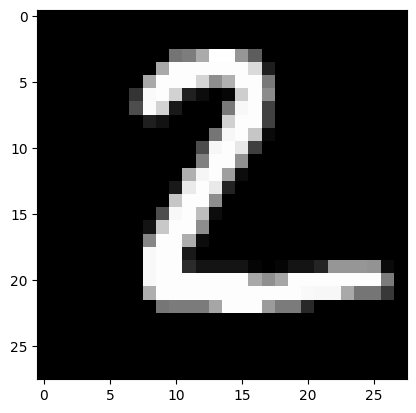

Model prediction: 2


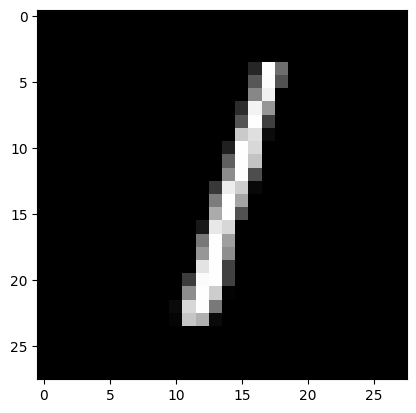

Model prediction: 1


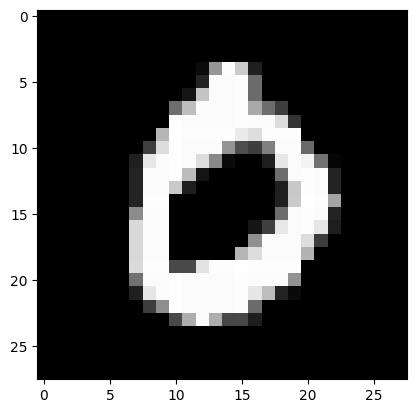

Model prediction: 0


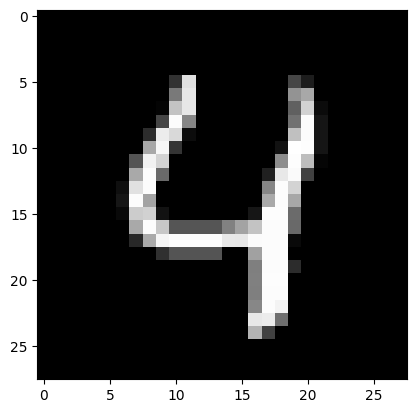

Model prediction: 4


In [60]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))